<div>
<img src="https://www.nebrija.com/images/logos/logotipo-universidad-nebrija.jpg" width="200">
</div>

**ALGORITMOS** -
Prof: Carmen Pellicer Lostao

# Optimizacion cuantica con algoritmos variacionales (VQE y QAOA)

In [1]:
!pip install qiskit-algorithms

In [2]:
import numpy as np
from qiskit.circuit.library import TwoLocal
from qiskit.primitives import Sampler
from qiskit_algorithms import NumPyMinimumEigensolver
from qiskit_algorithms.minimum_eigensolvers import (
    QAOA,
    NumPyMinimumEigensolver,
    SamplingVQE,
)
from qiskit_algorithms.optimizers import COBYLA, SPSA
from qiskit_optimization.applications import Maxcut
from qiskit_optimization.converters import QuadraticProgramToQubo


## Modelizacion de problemas de optimizacion en Qiskit

Para modelizar y resolver un problema de optimizacion en Qiskit se realizan los siguientes pasos:

1.  Construir el modelo matematico del problema de optimizacion cuadratico. Para ello tendremos que **construir un objeto de la clase `Quadratic Program`**

2.   **Conversión de `Quadratic Program` a un QUBO y a un Hamiltoniano de Ising**

3.   **Encontrar la solución mediante la funcion `MinimumEigenOptimizer`** utilizando el algoritmo de resolucion que nosotros deseemos (p.e. VQE o QAOA)



Tambien tiene implementadas otras clases que nos calculan el objeto de esta clase para problemas especificos de optimizacion. Ver librería [Aplicaciones de optimizacion](https://qiskit.org/ecosystem/optimization/apidocs/qiskit_optimization.applications.html)

## Problema de Optimizacion VertexCover

Formalmente, una [cubierta de vértice](https://en.wikipedia.org/wiki/Vertex_cover) V′ de un gráfico no dirigido G=(V,E) es un subconjunto de V tal que u,v∈E ⇒ u∈ V′ o v∈V′, es decir es un conjunto de vértices V′ donde cada arista tiene al menos un punto final en la cubierta de vértices V′. Se dice que un conjunto de este tipo cubre los bordes de V. La figura superior muestra dos ejemplos de coberturas de vértices, con algunas coberturas de vértices V′ marcadas en rojo.

Una cobertura de vértice mínima es una cobertura de vértice del tamaño más pequeño posible. El número de cobertura de vértice T es el tamaño de una cobertura de vértice mínima, es decir, T=|V′|. La figura inferior muestra ejemplos de coberturas mínimas de vértices en los gráficos anteriores.

Posibles aplicaciones de este problema:

* En redes de telecomunicaciones para monitoreo de tráfico: colocar un número limitado de equipos de monitoreo de tráfico en enrutadores en una red de telecomunicaciones.
* En redes de Transporte Público para monitoreo de tráfico: colocación de cámaras en cruces para monitorear el tráfico total con una mínima inversión.
* En Seguridad de Redes Informáticas o Redes Sociales: desarrollar estrategias para diseñar estrategias óptimas de protección de la red contra ataques de virus o noticias falsas en tiempo real protegiendo algunos nodos estratégicos de la red.

Creamos un grado de 6 nodos para el que debes de resolver el problema `Vertex Cover`.

Aplica los pasos de resolucion anteriores para este problema de optimizacion en este grado, utilizando las librerías de Qiskit y resolviendolo tanto con un Provider tradicional como con Runtime en entornos de simulacion.

[0, 1, 2, 3, 4, 5]
[(0, 1), (0, 2), (1, 2), (1, 3), (1, 5), (2, 3), (2, 4), (3, 4), (3, 5)]


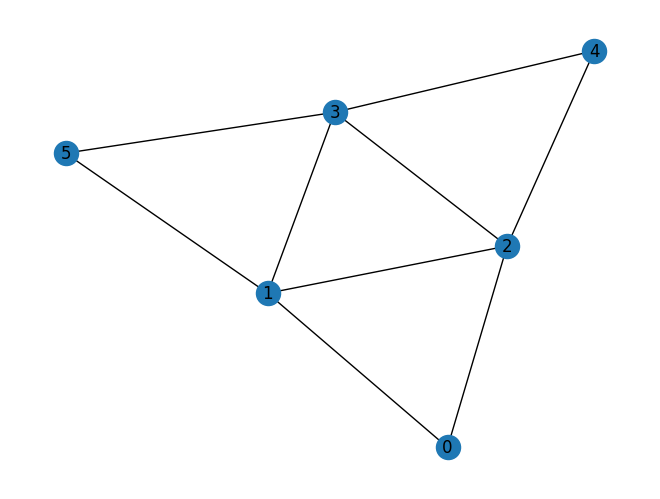

In [3]:
import networkx as nx
#Creamos un grafo, notese que los nombres de los nodos son numericos, esto es importante que sea asi para que funcione la clase VertexCover de qiskit_optimization.applications
n=6
G=nx.Graph()
G.add_nodes_from([0,1,2,3,4,5])
G.add_edge(0,1)
G.add_edge(0,2)
G.add_edge(1,2)
G.add_edge(1,3)
G.add_edge(2,3)
G.add_edge(2,4)
G.add_edge(3,4)
G.add_edge(1,5)
G.add_edge(3,5)

print(G.nodes())
print(G.edges())

maxcut = Maxcut(G)
maxcut.draw()

In [4]:
#Crear Quadratic Program
#https://qiskit.org/ecosystem/optimization/stubs/qiskit_optimization.applications.VertexCover.html#qiskit_optimization.applications.VertexCover
from qiskit_optimization.applications import VertexCover  #estas librerias de qiskit tienen helper functions para interpretar resultados


vertex_cover = VertexCover(G)

qp = vertex_cover.to_quadratic_program()

In [5]:
#Crear QUBO y H Ising
#converting to QUBO
qubo = QuadraticProgramToQubo().convert(qp)
display("qubo", qubo)

#converting QUBO task to Ising Hamiltonian for simulation on quantum computer
ising, offset = qubo.to_ising()
display("ising", ising) 
display("offset", offset)

'qubo'

<QuadraticProgram: minimize 7*x_0*x_1 + 7*x_0*x_2 + 7*x_1*x_2 + 7*x_1*x_3 + 7*..., 6 variables, 0 constraints, 'Vertex cover'>

'ising'

SparsePauliOp(['IIIIIZ', 'IIIIZI', 'IIIZII', 'IIZIII', 'IZIIII', 'ZIIIII', 'IIIIZZ', 'IIIZIZ', 'IIIZZI', 'IIZIZI', 'ZIIIZI', 'IIZZII', 'IZIZII', 'IZZIII', 'ZIZIII'],
              coeffs=[3.  +0.j, 6.5 +0.j, 6.5 +0.j, 6.5 +0.j, 3.  +0.j, 3.  +0.j, 1.75+0.j,
 1.75+0.j, 1.75+0.j, 1.75+0.j, 1.75+0.j, 1.75+0.j, 1.75+0.j, 1.75+0.j,
 1.75+0.j])

'offset'

18.75

Numpy Minimum Eigenvalue
{   'aux_operators_evaluated': None,
    'eigenstate': Statevector([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j],
            dims=(2, 2, 2, 2, 2, 2)),
    'eigenvalue': (-15.75+0j)}


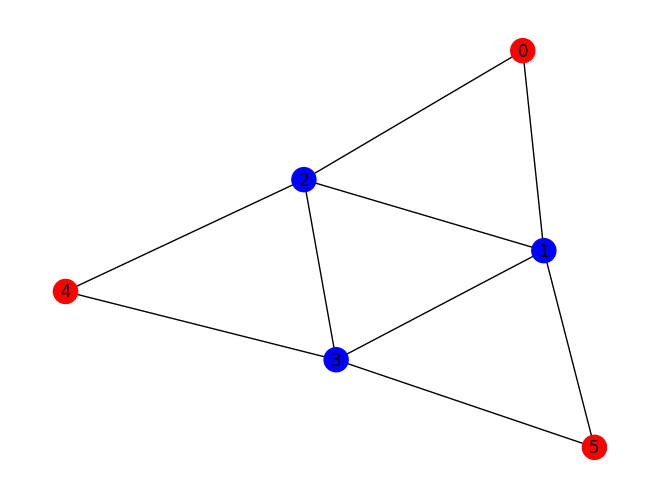

In [6]:
#Resolver con algoritmo clásico de Numpy
# Numpy Eigensolver
np_eigensolver = NumPyMinimumEigensolver()

result = np_eigensolver.compute_minimum_eigenvalue(ising)
print("Numpy Minimum Eigenvalue")
print(result)

solutions = result.eigenstate.probabilities_dict()
nodes = np.array([int(node) for node in list(solutions.keys())[0][::-1]])

maxcut.draw(nodes)

[0 1 1 1 0 0]


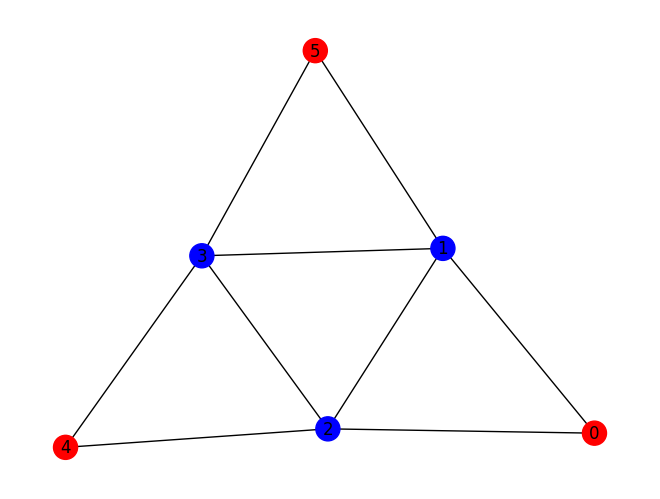

In [7]:
#Resolver con VQE Runtime
n=5
ansatz = TwoLocal(n, 'ry', 'cz')
opt = SPSA(maxiter=50)
 
# shot-based simulation
sampler = Sampler(options={"shots": 2048})
vqe = SamplingVQE(sampler, ansatz, opt, aggregation=0.2)

#find min eigenvalue
result = vqe.compute_minimum_eigenvalue(ising)

#display results in the graph
nd=np.array([int(i) for i in result.best_measurement['bitstring'][::-1]])
print(nd)
maxcut.draw(nd)

[0 1 1 1 0 0]


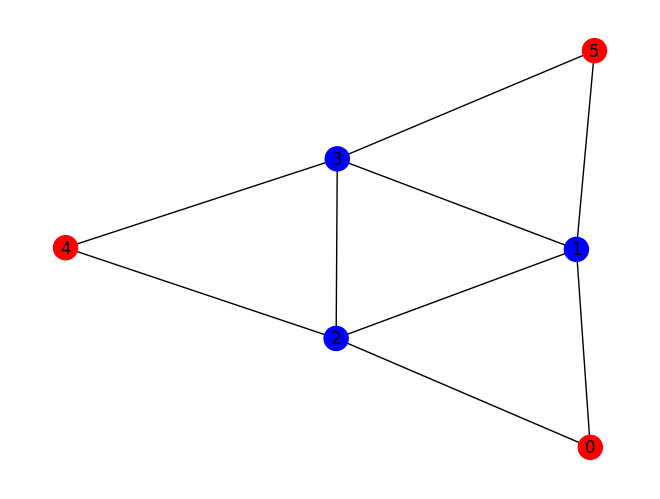

In [8]:
#Resolver con QAOA Runtime
sampler = Sampler(options={"shots": 2048})
 
optimizer = COBYLA()
qaoa = QAOA(sampler, optimizer, reps=1) 
result = qaoa.compute_minimum_eigenvalue(ising)

#display results in the graph
nd=np.array([int(i) for i in result.best_measurement['bitstring'][::-1]])
print(nd)

maxcut.draw(nd)